In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [4]:
config_file = "model/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model ="model/frozen_inference_graph.pb"


In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)


In [8]:
classLables = []
file_name = "labels.txt"
with open(file_name, "rt") as fpt:
  classLables = fpt.read().rstrip('\n').split('\n')

In [28]:
print((classLables))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [13]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002DC5FD37DB0>

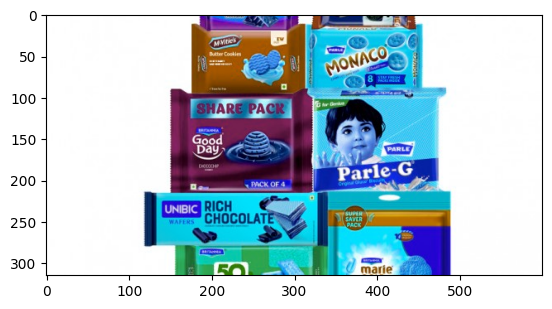

In [30]:
img = cv2.imread("images/bis.jpg")
plt.imshow(img)

In [31]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [32]:
print(ClassIndex)

[ 1  1 82]


In [27]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img, classLables[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color=(0,255,0), thickness =3)

AttributeError: 'tuple' object has no attribute 'flatten'

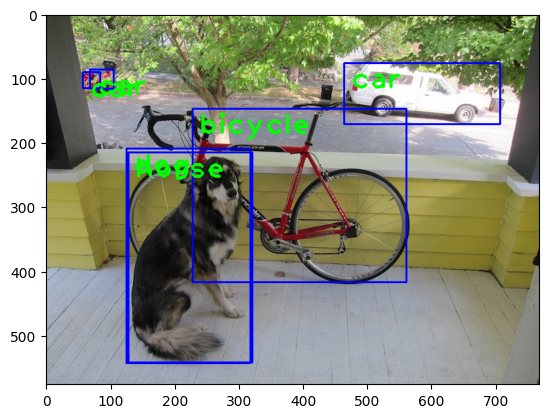

In [23]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))